# IMAGE CLASSIFICATION & COMPUTER VISION PROJECT

<h2> Part-1 : Train a deep learning classifier for any binary image classification task of your choice. The deep-learning classifier should consist of a set of convolutional and fully connected layers followed by the final output layer for image classification. </h2> 

In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '1'  # or any level higher than 0
import cv2
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.metrics import accuracy_score, f1_score, recall_score
from sklearn.model_selection import train_test_split

In [2]:
import os
import cv2
import numpy as np

def run(folder, label):
    images = []
    labels = []
    count = 0
    for filename in os.listdir(folder):
        # Check if the file is an image
        if filename.endswith('.jpg') or filename.endswith('.jpeg') or filename.endswith('.png'):
            # Read the image file using OpenCV
            img_path = os.path.join(folder, filename)
            img = cv2.imread(img_path)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB format
            images.append(img)
            labels.append(label)
            count += 1
            if count == 150: 
                break
                
    return np.array(images), np.array(labels)

In [3]:
# def load_images_from_directory(directory, label, num_images):
#     images = []
#     labels = []
#     count = 0
#     for file in os.listdir(directory):
#         if count >= num_images:
#             break
#         img_path = os.path.join(directory, file)
#         img = cv2.imread(img_path)
#         img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB format
#         images.append(img)
#         labels.append(label)
#         count += 1
#     return np.array(images), np.array(labels)

In [4]:
#Load training and testing datasets
train_real_dir = '/Users/nithinreddynagapur/Downloads/archive/real-vs-fake/train/real'
train_fake_dir = '/Users/nithinreddynagapur/Downloads/archive/real-vs-fake/train/fake'
test_real_dir = '/Users/nithinreddynagapur/Downloads/archive/real-vs-fake/test/real'
test_fake_dir = '/Users/nithinreddynagapur/Downloads/archive/real-vs-fake/test/fake'
valid_real_dir = '/Users/nithinreddynagapur/Downloads/archive/real-vs-fake/valid/real'
valid_fake_dir = '/Users/nithinreddynagapur/Downloads/archive/real-vs-fake/valid/fake'

In [5]:
real_train, real_train_labels = run(train_real_dir, 0)
fake_train, fake_train_labels = run(train_fake_dir, 1)

real_test, real_test_labels = run(test_real_dir, 0)
fake_test, fake_test_labels = run(test_fake_dir, 1)

real_valid, real_test_valid = run(valid_real_dir, 0)
fake_valid, fake_test_valid = run(valid_fake_dir, 1)

In [6]:
# Combine real and fake images to form the final training and testing sets
X_train = np.concatenate((real_train, fake_train), axis=0)
y_train = np.concatenate((real_train_labels, fake_train_labels), axis=0)

X_test = np.concatenate((real_test, fake_test), axis=0)
y_test = np.concatenate((real_test_labels, fake_test_labels), axis=0)

X_valid = np.concatenate((real_valid, fake_valid), axis=0)
y_valid = np.concatenate((real_test_valid, fake_test_valid), axis=0)

In [7]:
X_train.shape #150 train set & #150 test and validiation set

(300, 256, 256, 3)

<b> CNN Without any regularisation </b>

In [8]:
# X_train.shape[1], X_train.shape[2], X_train.shape[3]

# def create_cnn(input_shape):
#     model = models.Sequential()
    
#     model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
#     model.add(layers.MaxPooling2D((2, 2)))
    
#     model.add(layers.Conv2D(32, (3, 3), activation='relu'))
#     model.add(layers.MaxPooling2D((2, 2)))
    
#     model.add(layers.Conv2D(64, (3, 3), activation='relu'))
#     model.add(layers.MaxPooling2D((2, 2)))
    
#     model.add(layers.Conv2D(64, (3, 3), activation='relu'))
#     model.add(layers.MaxPooling2D((2, 2)))
    
#     model.add(layers.Conv2D(128, (3, 3), activation='relu'))
#     model.add(layers.MaxPooling2D((2, 2)))
#     model.add(layers.Flatten())

#     model.add(layers.Dense(512, activation='relu'))
#     model.add(layers.BatchNormalization())
#     model.add(layers.Dropout(0.5))
    
#     model.add(layers.Dense(1, activation='sigmoid'))

#     return model

<b> CNN With L1 regularisation </b>

In [ ]:
# X_train.shape[1],learning_rate=rain.shape[2], X_train.shape[3]

# def l1_create_cnn(input_shape):
#     model = models.Sequential()
    
#     model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape ))
#     model.add(layers.MaxPooling2D((2, 2)))
    
#     model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
#     model.add(layers.MaxPooling2D((2, 2)))
    
#     model.add(layers.Conv2D(64, (3, 3), activation='relu', use_bias=True, kernel_regularizer=tf.keras.regularizers.l1(l=0.01)))
#     model.add(layers.MaxPooling2D((2, 2)))
    
#     model.add(layers.Conv2D(128, (3, 3), activation='relu', use_bias=True, kernel_regularizer=tf.keras.regularizers.l1(l=0.01)))
#     model.add(layers.MaxPooling2D((2, 2)))
    
#     model.add(layers.Conv2D(128, (3, 3), activation='relu', use_bias=True, kernel_regularizer=tf.keras.regularizers.l1(l=0.01)))
#     model.add(layers.MaxPooling2D((2, 2)))
#     model.add(layers.Flatten())
    
#     model.add(layers.Dense(256, activation='relu', use_bias=True, kernel_regularizer=tf.keras.regularizers.l1(l=0.01)))
#     model.add(layers.Dropout(0.5))
    
#     model.add(layers.Dense(1, activation='sigmoid'))

#     return model

<b> CNN With any L2 regularisation </b>

In [10]:
def create_cnn(input_shape):
    model = models.Sequential()

    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2)))

    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2)))

    model.add(layers.Conv2D(128, (3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(l=0.01)))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2)))

    model.add(layers.Conv2D(256, (3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(l=0.01)))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2)))

    model.add(layers.Flatten())

    model.add(layers.Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(l=0.01)))
    model.add(layers.BatchNormalization())
    model.add(layers.Dropout(0.5))

    model.add(layers.Dense(1, activation='sigmoid'))

    return model

In [11]:
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers, callbacks

In [12]:
# import tensorflow as tf
# from tensorflow.keras import layers, models

# def create_cnn(input_shape):
#     model = models.Sequential()

#     model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
#     model.add(layers.BatchNormalization())
#     model.add(layers.MaxPooling2D((2, 2)))
#     model.add(layers.Dropout(0.25))  # Dropout layer after the first block

#     model.add(layers.Conv2D(64, (3, 3), activation='relu'))
#     model.add(layers.BatchNormalization())
#     model.add(layers.MaxPooling2D((2, 2)))
#     model.add(layers.Dropout(0.25))  # Dropout layer after the second block

#     model.add(layers.Conv2D(128, (3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(l=0.01)))
#     model.add(layers.BatchNormalization())
#     model.add(layers.MaxPooling2D((2, 2)))
#     model.add(layers.Dropout(0.25))  # Dropout layer after the third block

#     model.add(layers.Conv2D(256, (3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(l=0.01)))
#     model.add(layers.BatchNormalization())
#     model.add(layers.MaxPooling2D((2, 2)))
#     model.add(layers.Dropout(0.25))  # Dropout layer after the fourth block

#     model.add(layers.Flatten())

#     model.add(layers.Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(l=0.01)))
#     model.add(layers.BatchNormalization())
#     model.add(layers.Dropout(0.5))  # Dropout layer after the dense layer

#     model.add(layers.Dense(1, activation='sigmoid'))

#     return model

In [13]:
input_shape = (256, 256, 3)
model = create_cnn(input_shape)

Metal device set to: Apple M1


In [14]:
optimizer = optimizers.Adam(learning_rate=1e-4)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

In [15]:
early_stopping = callbacks.EarlyStopping(monitor='val_loss', patience=5, verbose=1)
model_checkpoint = callbacks.ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True, verbose=1)
reduce_lr_on_plateau = callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, verbose=1)

In [16]:
import time

In [17]:
start = time.time()
history = model.fit(X_train, y_train,
                    epochs=100,
                    batch_size=64,
                    validation_data=(X_valid, y_valid),
                    callbacks=[early_stopping, model_checkpoint, reduce_lr_on_plateau])
end = time.time()

Epoch 1/100
5/5 [==============================] - ETA: 0s - loss: 8.9333 - accuracy: 0.5100
Epoch 1: val_loss improved from inf to 8.67585, saving model to best_model.h5
5/5 [==============================] - 19s 3s/step - loss: 8.9333 - accuracy: 0.5100 - val_loss: 8.6759 - val_accuracy: 0.4667 - lr: 1.0000e-04
Epoch 2/100
5/5 [==============================] - ETA: 0s - loss: 7.9869 - accuracy: 0.8333
Epoch 2: val_loss did not improve from 8.67585
5/5 [==============================] - 9s 2s/step - loss: 7.9869 - accuracy: 0.8333 - val_loss: 9.5886 - val_accuracy: 0.5000 - lr: 1.0000e-04
Epoch 3/100
5/5 [==============================] - ETA: 0s - loss: 7.7775 - accuracy: 0.8967
Epoch 3: val_loss did not improve from 8.67585
5/5 [==============================] - 11s 2s/step - loss: 7.7775 - accuracy: 0.8967 - val_loss: 8.8568 - val_accuracy: 0.4900 - lr: 1.0000e-04
Epoch 4/100
5/5 [==============================] - ETA: 0s - loss: 7.6368 - accuracy: 0.9367
Epoch 4: val_loss improve

In [19]:
def plot_history(history):
    # Plot the training and validation accuracy
    plt.figure()
    plt.plot(history.history['accuracy'], label='Training accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.title('Training and Validation Accuracy')
    plt.savefig('/Users/nithinreddynagapur/Desktop/Image_project/Images/1Accuracy.png')

    # Plot the training and validation loss
    plt.figure()
    plt.plot(history.history['loss'], label='Training loss')
    plt.plot(history.history['val_loss'], label='Validation loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Training and Validation Loss')
    plt.savefig('/Users/nithinreddynagapur/Desktop/Image_project/Images/1loss.png')

    plt.show()

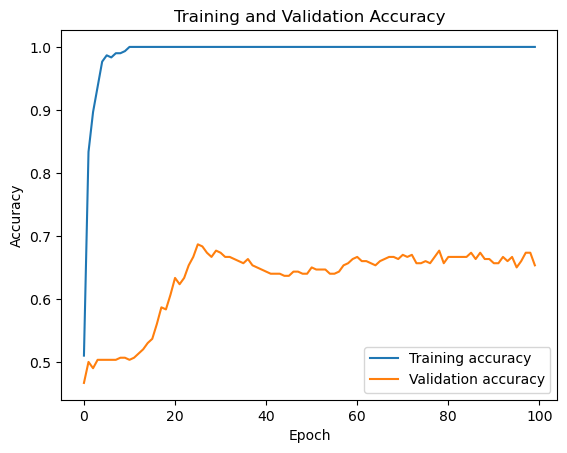

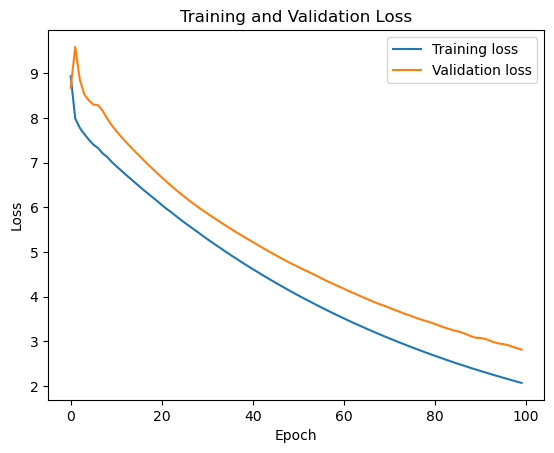

In [20]:
# Assuming 'history' is the output of the model.fit() function
plot_history(history)

In [21]:
# Predict the labels for the test dataset
y_pred = np.argmax(model.predict(X_test), axis=-1)

10/10 [==============================] - 1s 116ms/step


In [22]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

10/10 [==============================] - 1s 112ms/step - loss: 2.9180 - accuracy: 0.6533
Test loss: 2.91804838180542
Test accuracy: 0.6533333659172058


In [23]:
from tensorflow.keras.models import load_model
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report

In [24]:
test_data = X_test
test_labels = y_test

In [25]:
# Load the best model
best_model = load_model('best_model.h5')

In [26]:
# Make predictions on the test set
y_pred = best_model.predict(test_data)
y_pred_classes = np.argmax(y_pred, axis=1)

10/10 [==============================] - 1s 119ms/step


In [27]:
# Calculate the evaluation metrics
accuracy = accuracy_score(test_labels, y_pred_classes)
precision = precision_score(test_labels, y_pred_classes, average='weighted', zero_division=0)
recall = recall_score(test_labels, y_pred_classes, average='weighted')

In [28]:
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")

# Print the classification report
print("\nClassification Report:")
print(classification_report(test_labels, y_pred_classes, zero_division=0))

Accuracy: 0.50
Precision: 0.25
Recall: 0.50

Classification Report:
              precision    recall  f1-score   support

           0       0.50      1.00      0.67       150
           1       0.00      0.00      0.00       150

    accuracy                           0.50       300
   macro avg       0.25      0.50      0.33       300
weighted avg       0.25      0.50      0.33       300



In [29]:
# Save the model to a HDF5 file
model.save('model.h5')

# Load the saved model
loaded_model = tf.keras.models.load_model('model.h5')

<h2> Part - 2 : Extract features from the samples in the validation set (using one of the fully connected layers of your model) and train a SVM (linear or non-linear) using these samples for the same classification task.Test this SVM on the test set (extract the features from the test set using the same fully connected layer). Use appropriate metrics to evaluate the SVM model on the test set. </b>

In [57]:
import numpy as np
import tensorflow as tf
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [31]:
model = loaded_model

In [34]:
# Extract features from the validation set using a fully connected layer of the model
layer_name = 'dense' # name of the desired fully connected layer

In [35]:
intermediate_layer_model = tf.keras.Model(inputs=model.input, outputs=model.get_layer(layer_name).output)

In [36]:
features = intermediate_layer_model.predict(X_valid)

10/10 [==============================] - 5s 499ms/step


In [52]:
# Train a linear SVM classifier on the extracted features
clf = SVC(kernel='rbf')
clf.fit(features, y_valid)

SVC()

In [53]:
# Extract features from the test set
features_test = intermediate_layer_model.predict(X_test)

10/10 [==============================] - 1s 116ms/step


In [54]:
# Make predictions on the test set using the trained SVM classifier
y_pred = clf.predict(features_test)

In [55]:
# Calculate the evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred, average='weighted')

In [56]:
# Print the evaluation metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")

Accuracy: 0.67
Precision: 0.68
Recall: 0.67


In [61]:
# calculate the confusion matrix
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion matrix:')
print(conf_matrix)

Confusion matrix:
[[109  41]
 [ 57  93]]


In [62]:
# calculate the classification report
from sklearn.metrics import classification_report
class_report = classification_report(y_test, y_pred)
print('Classification report:')
print(class_report)

Classification report:
              precision    recall  f1-score   support

           0       0.66      0.73      0.69       150
           1       0.69      0.62      0.65       150

    accuracy                           0.67       300
   macro avg       0.68      0.67      0.67       300
weighted avg       0.68      0.67      0.67       300



Refrence: 

1. https://medium.com/mlearning-ai/underfitting-and-overfitting-in-deep-learning-687b1b7eb738#:~:text=In Short: Overfitting means that, performs poorly on both datasets.  (Overfitting problems)

2. https://medium.com/intelligentmachines/convolutional-neural-network-and-regularization-techniques-with-tensorflow-and-keras-5a09e6e65dc7  (adding l1,l2,dropouts)

3. https://towardsdatascience.com/classification-of-neural-network-hyperparameters-c7991b6937c3 

4. https://medium.com/data-science-365/determining-the-right-batch-size-for-a-neural-network-to-get-better-and-faster-results-7a8662830f15 

5. https://towardsdatascience.com/how-to-choose-the-optimal-learning-rate-for-neural-networks-362111c5c783 

6. https://towardsdatascience.com/classification-of-neural-network-hyperparameters-c7991b6937c3 

7. https://medium.com/data-science-365/all-you-need-to-know-about-batch-size-epochs-and-training-steps-in-a-neural-network-f592e12cdb0a 

8. https://medium.com/data-science-365/how-to-apply-l1-and-l2-regularization-techniques-to-keras-models-da6249d8a469 